# 02 Exploratory Data Analysis (EDA)

## Import libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# set a plot style
plt.style.use('bmh')

## Read the Datasets

In [67]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
train_trimmed = pd.read_csv('../datasets/train_trimmed.csv')
test_trimmed = pd.read_csv('../datasets/test_trimmed.csv')

In [68]:
print('shape for train dataframe:', train.shape)
print('shape for test dataframe:', test.shape)
print('shape for train_trimmed dataframe:', train_trimmed.shape)
print('shape for test_trimmed dataframe:', test_trimmed.shape)

shape for train dataframe: (1538, 82)
shape for test dataframe: (513, 81)
shape for train_trimmed dataframe: (1533, 31)
shape for test_trimmed dataframe: (513, 30)


In [76]:
#selected numeric, nominal, and ordinal features
numeric_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', 
                'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces', 'Lot Frontage',
                'Lot Area', 'porch_deck_sqft', 'all_baths_count']

nominal_features = ['Neighborhood', 'MS Zoning', 'Bldg Type', 'Mas Vnr Type', 'House Style', 'Foundation','Sale Type']

ordinal_features = ['Overall Qual','Overall Cond','Exter Qual','Bsmt Qual', 'Heating QC','Kitchen Qual', 'Functional', 'Electrical','Garage Qual']

## Summary statistics of "SalePrice"

- conduct a summary statistics of "SalePrice" in the train.csv dataset without removing any observations.
- the average "SalePrice" is \\$180,973.
- "SalePrice" histogram distribution shows a right-skewed distribution.
- "SalePrice" boxplot shows the average (red line) and some outliers near the top of the price range.

In [70]:
train['SalePrice'].describe()

count      1538.000000
mean     181061.993498
std       79552.718835
min       13100.000000
25%      129925.000000
50%      162250.000000
75%      213000.000000
max      611657.000000
Name: SalePrice, dtype: float64

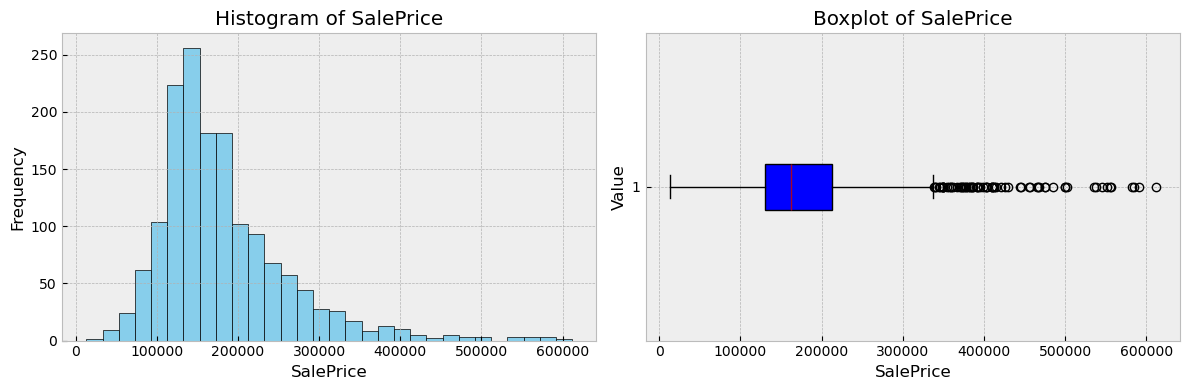

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure and a 1x2 grid of subplots.
# Histogram of 'SalePrice'
ax[0].hist(train['SalePrice'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of SalePrice')
ax[0].set_xlabel('SalePrice')
ax[0].set_ylabel('Frequency')

# Boxplot of 'SalePrice'
ax[1].boxplot(train['SalePrice'], vert=False, patch_artist=True)
ax[1].set_title('Boxplot of SalePrice')
ax[1].set_xlabel('SalePrice')
ax[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

## Features Analysis and Engineering

**To explore the relationship between "SalePrice" and some features below, I use **'train_trimmed'** dataset.**

In [77]:
numeric_features

['Gr Liv Area',
 'Total Bsmt SF',
 'Garage Cars',
 'Garage Area',
 'Year Built',
 'Year Remod/Add',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces',
 'Lot Frontage',
 'Lot Area',
 'porch_deck_sqft',
 'all_baths_count']

In [48]:
train_trimmed[numeric_features]

Gr Liv Area  Total Bsmt SF  Garage Cars  Garage Area  Year Built  \
0            1587         1587.0          2.0        525.0        1971   
1            2267         1005.0          2.0        498.0        1937   
2             864          864.0          2.0        720.0        1950   
3            2260         1306.0          2.0        533.0        1996   
4            2501         1242.0          3.0        751.0        1995   
...           ...            ...          ...          ...         ...   
1528         2100          918.0          3.0        786.0        2007   
1529         1196         1196.0          1.0        297.0        1956   
1530         1309         1040.0          2.0        484.0        1974   
1531          987          483.0          1.0        280.0        1970   
1532         1525         1525.0          2.0        541.0        2000   

      Year Remod/Add  TotRms AbvGrd  Mas Vnr Area  Fireplaces  Lot Frontage  \
0               1971              7         302.0           1     85.000000   
1               1980              7           0.0           2    107.000000   
2               2002              5           0.0           0     60.000000   
3               1997              7           0.0           0     80.000000   
4               1995              9         466.0           1     88.733333   
...              ...            ...           ...         ...           ...   
1528            2007              8         120.0           2     82.000000   
1529            1956              6          74.0           1     72.000000   
1530            1999              5          99.0           1     78.000000   
1531            1970              5         127.0           0     21.000000   
1532            2000              6         244.0           0     70.000000   

      Lot Area  porch_deck_sqft  all_baths_count  
0        10667               44              2.0  
1        12888              521              3.0  
2         7200              194              2.0  
3        14000              340              4.0  
4        11929              279              3.0  
...        ...              ...              ...  
1528      9709              276              4.0  
1529      9000               44              2.0  
1530     10140              265              3.0  
1531      1869                0              2.0  
1532      9100              255              3.0  

[1533 rows x 13 columns]

### Pairplots of Numeric Features

- The pairplots below shows the relationship between "SalePrice" and 13 numeric features.
- In the last row, the 13 numeric features have a strong positive relationship with "SalePrice", so they are good features for the regression model.

In [87]:
numeric_train_trimmed = train_trimmed[numeric_features + ["SalePrice"]]
numeric_train_trimmed.head()

Gr Liv Area  Total Bsmt SF  Garage Cars  Garage Area  Year Built  \
0         1587         1587.0          2.0        525.0        1971   
1         2267         1005.0          2.0        498.0        1937   
2          864          864.0          2.0        720.0        1950   
3         2260         1306.0          2.0        533.0        1996   
4         2501         1242.0          3.0        751.0        1995   

   Year Remod/Add  TotRms AbvGrd  Mas Vnr Area  Fireplaces  Lot Frontage  \
0            1971              7         302.0           1     85.000000   
1            1980              7           0.0           2    107.000000   
2            2002              5           0.0           0     60.000000   
3            1997              7           0.0           0     80.000000   
4            1995              9         466.0           1     88.733333   

   Lot Area  porch_deck_sqft  all_baths_count  SalePrice  
0     10667               44              2.0     167300  
1     12888              521              3.0     219000  
2      7200              194              2.0     129000  
3     14000              340              4.0     328000  
4     11929              279              3.0     290000

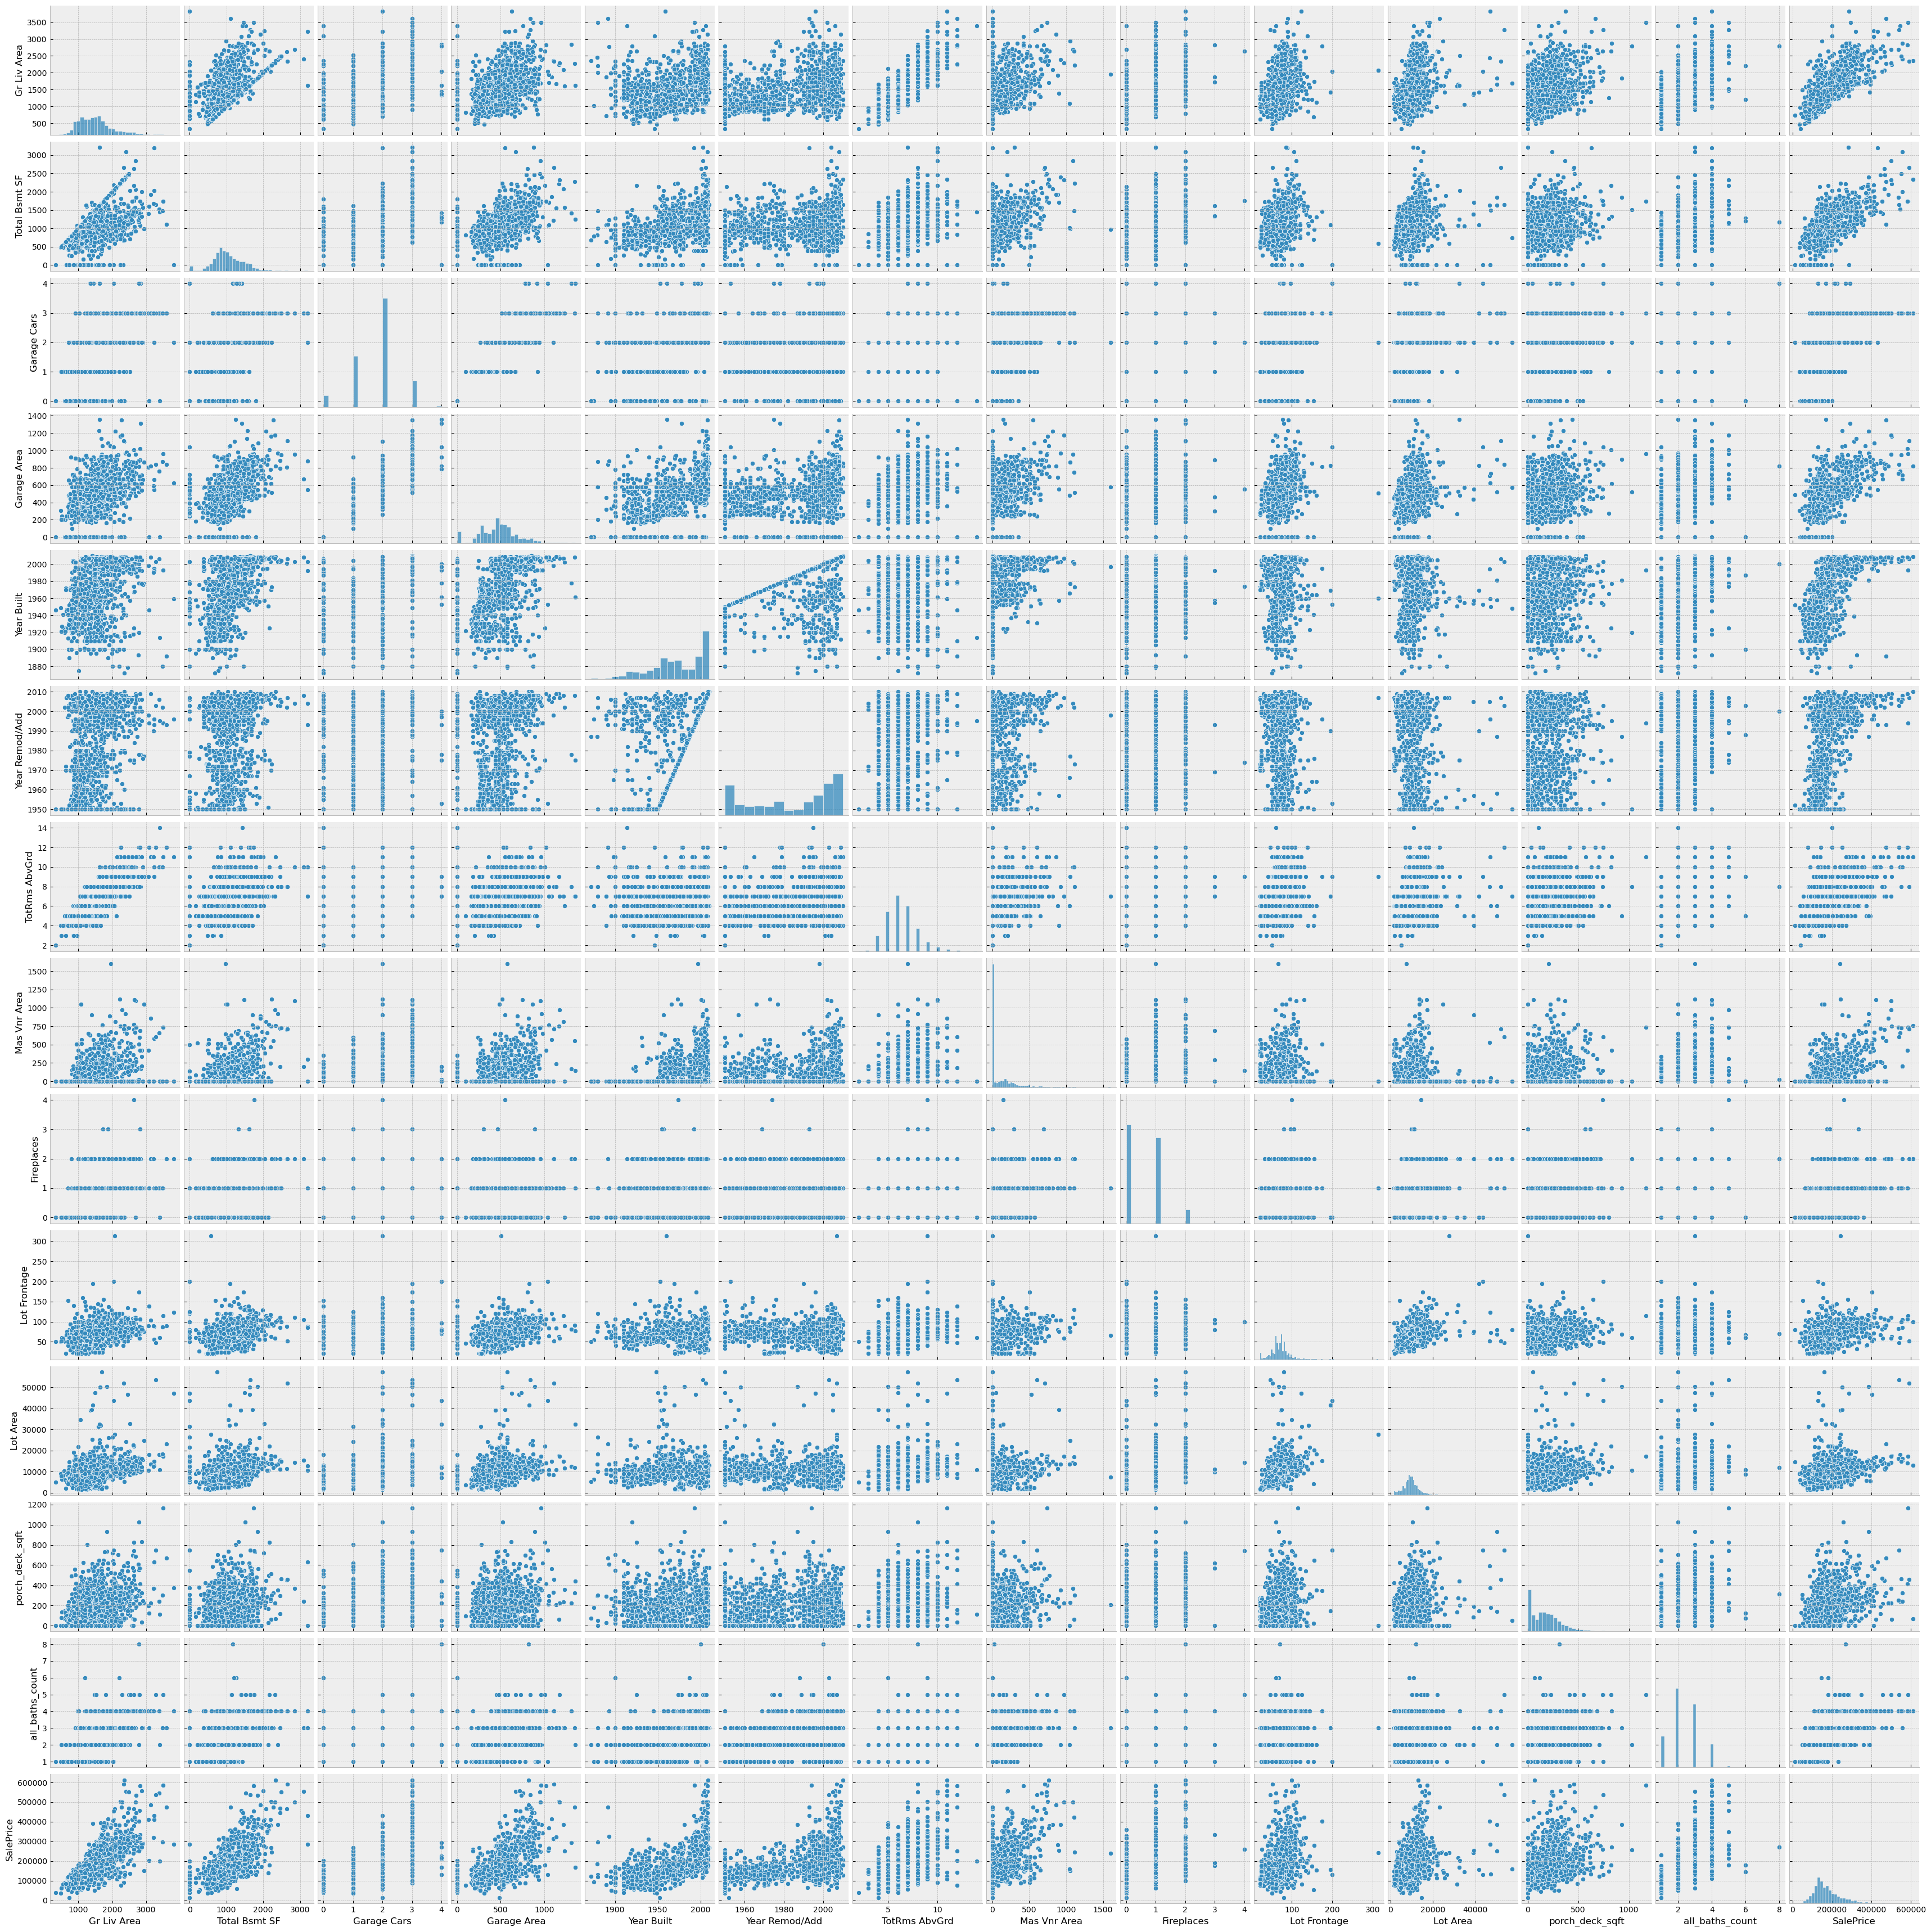

In [88]:
sns.pairplot(numeric_train_trimmed)

## Correlation Heatmap of Numeric Features

- the correlation heatmap shows that these numeric features are positively correlated to 'SalePrice', especially "Gr Liv Area" and "Total Bsmt SF".
- "Gr Liv Area" and "TotRmsAbvGrd" seems to be strongly correlated.

<Axes: >

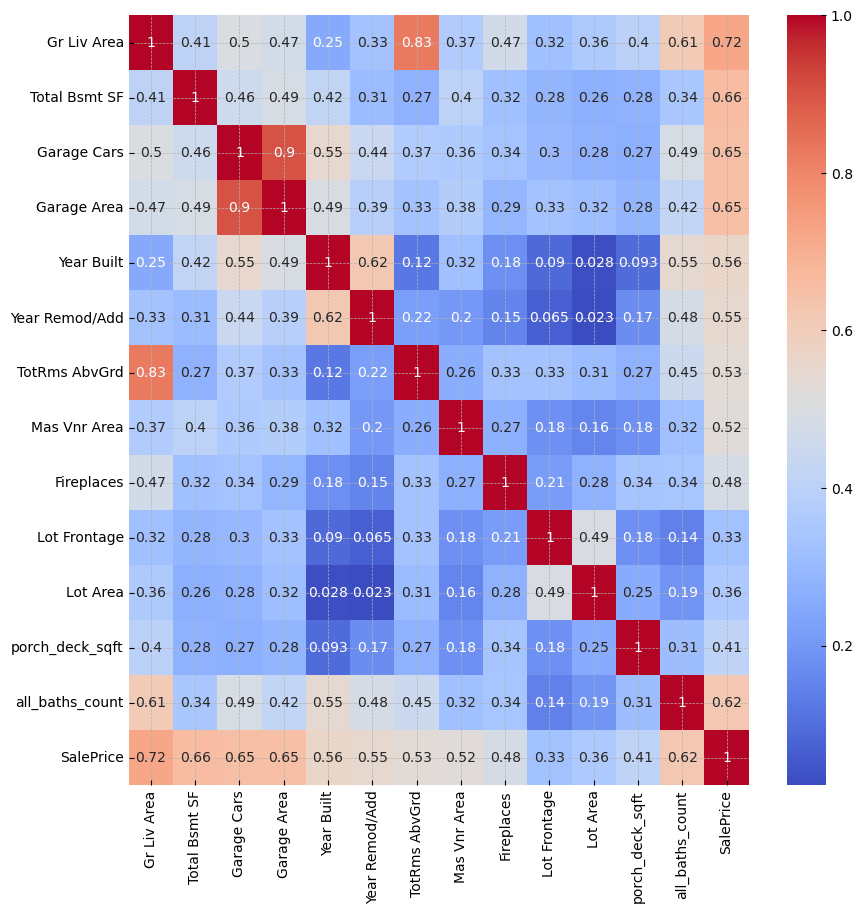

In [94]:
# Create a correlation matrix for the numeric columns
numeric_train_trimmed_correlations = numeric_train_trimmed.corr()
plt.figure(figsize = (10,10))
# Create a heatmap of the correlation matrix
sns.heatmap(numeric_train_trimmed_correlations, cmap='coolwarm', annot=True)

#### 'Overal Quality' vs. 'SalePrice'

- scatterplot of 'Overall Qual' vs Saleprice shows that 'Overall Qual' is ordinal feature that is positively correlate to "SalePrice".

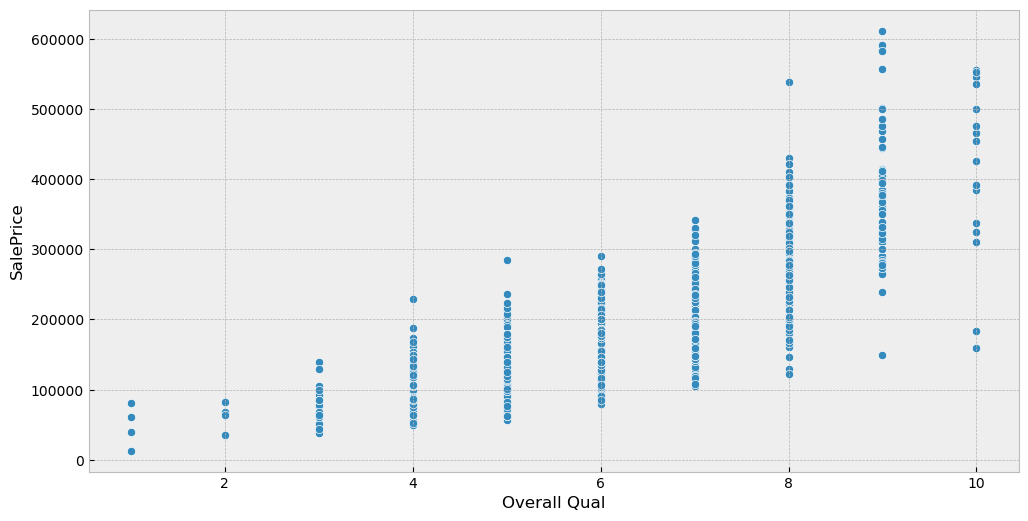

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=train)
plt.savefig('OverallQual.png', dpi=300)

#### 'Gr Liv Area' vs. 'SalePrice'

- scatterplot of 'Gr Liv Area' (Above Ground Living Area in sqft) vs 'Saleprice' shows that 'Gr Liv Area' is a numerical feature that is positively correlate to "SalePrice".

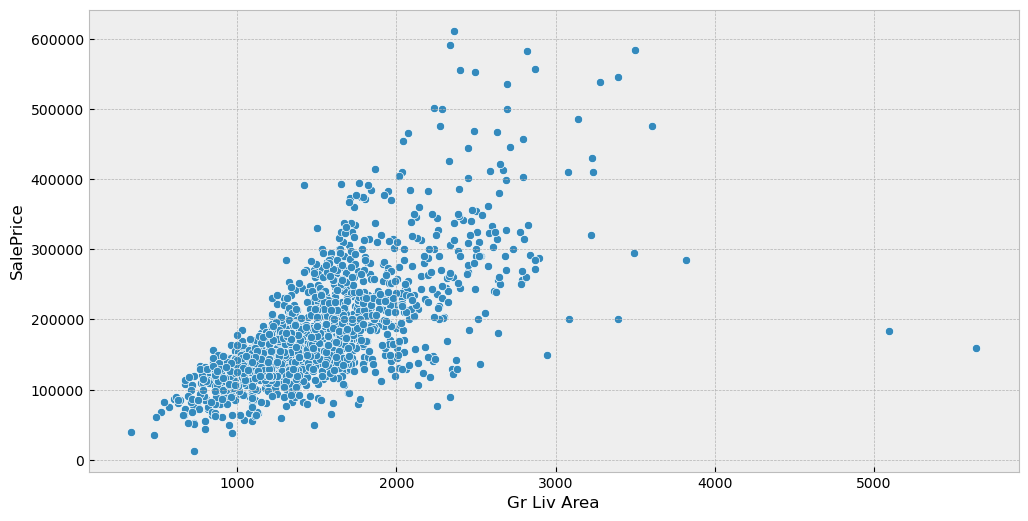

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=train)
plt.savefig('GrLivArea_outlier.png', dpi=300)

- scatterplot of 'neighborhood' vs 'Saleprice' shows that 'Gr Liv Area' is a nonimal feature that shows a diverse range in "SalePrice" depending on the neigborhood.

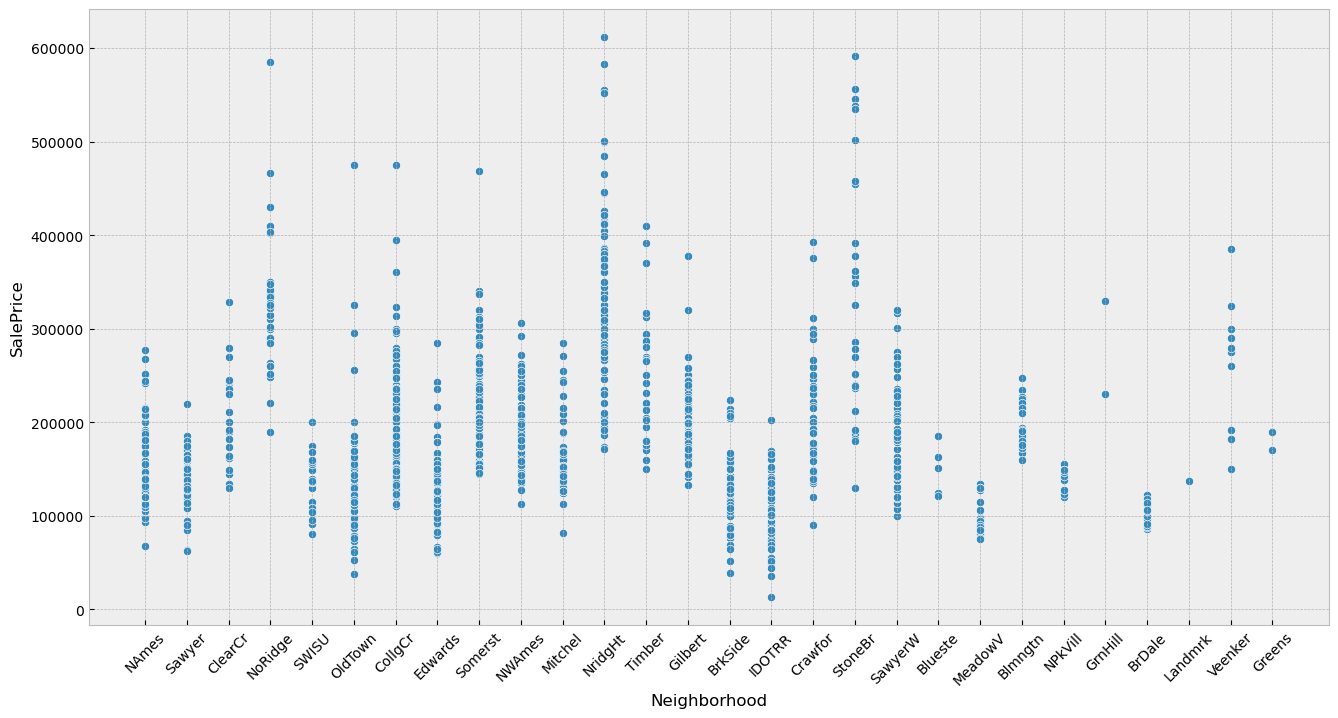

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Neighborhood',y='SalePrice',data=train)
plt.xticks(rotation=45);
plt.savefig('neighborhood.png', dpi=300)